In [74]:
import pandas as pd

In [75]:
#数据加载
df=pd.read_csv('tianchi_fresh_comp_train_user.csv')
df

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,10001082,285259775,1,97lk14c,4076,2014-12-08 18
1,10001082,4368907,1,NaN,5503,2014-12-12 12
2,10001082,4368907,1,NaN,5503,2014-12-12 12
3,10001082,53616768,1,NaN,9762,2014-12-02 15
4,10001082,151466952,1,NaN,5232,2014-12-12 11
...,...,...,...,...,...,...
23291022,65341491,259008790,1,NaN,13164,2014-12-03 12
23291023,65341491,336404938,1,NaN,13164,2014-12-03 12
23291024,65341491,52142024,1,95qhbsu,5201,2014-12-10 22
23291025,65341491,250557965,1,NaN,13164,2014-12-03 12


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23291027 entries, 0 to 23291026
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        int64 
 1   item_id        int64 
 2   behavior_type  int64 
 3   user_geohash   object
 4   item_category  int64 
 5   time           object
dtypes: int64(4), object(2)
memory usage: 1.0+ GB


In [77]:
#计算CVR
count_user=df['behavior_type'].value_counts()
count_user

1    21940520
3      659437
2      458491
4      232579
Name: behavior_type, dtype: int64

In [78]:
#计算CVR
count_all,count_4=0,0
count_all=count_user[1]+count_user[2]+count_user[3]+count_user[4]
print("count_all={}".format(count_all))
count_4+=count_user[4]
print("count_4={}".format(count_4))
cvr=(count_4/count_all)*100
print("cvr:{}".format(cvr))

count_all=23291027
count_4=232579
cvr:0.9985776926023916


In [79]:
count_user.sum()

23291027

In [80]:
#将time字段设置为pandas中的datatime类型
df['time']=pd.to_datetime(df['time'])
df['time']

0          2014-12-08 18:00:00
1          2014-12-12 12:00:00
2          2014-12-12 12:00:00
3          2014-12-02 15:00:00
4          2014-12-12 11:00:00
                   ...        
23291022   2014-12-03 12:00:00
23291023   2014-12-03 12:00:00
23291024   2014-12-10 22:00:00
23291025   2014-12-03 12:00:00
23291026   2014-11-29 08:00:00
Name: time, Length: 23291027, dtype: datetime64[ns]

In [81]:
df.index

RangeIndex(start=0, stop=23291027, step=1)

In [82]:
df.index=df['time']
df.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
time,,,,,,
2014-12-08 18:00:00,10001082,285259775,1,97lk14c,4076,2014-12-08 18:00:00
2014-12-12 12:00:00,10001082,4368907,1,NaN,5503,2014-12-12 12:00:00
2014-12-12 12:00:00,10001082,4368907,1,NaN,5503,2014-12-12 12:00:00
2014-12-02 15:00:00,10001082,53616768,1,NaN,9762,2014-12-02 15:00:00
2014-12-12 11:00:00,10001082,151466952,1,NaN,5232,2014-12-12 11:00:00


In [83]:
from collections import defaultdict
from datetime import datetime,timedelta

In [84]:
count_day=defaultdict(int)
#从2014-11-18遍历到2014-12-18
str1='2014-11-17'
temp_date=datetime.strptime(str1,'%Y-%m-%d')
delta=timedelta(days=1)
for i in range(31):
    temp_date=temp_date+delta
    #将时间转化为字符串类型
    temp_str=temp_date.strftime('%Y-%m-%d')
    #df的index为时间
    count_day[temp_str]+=df[temp_str].shape[0]
print(count_day)

defaultdict(<class 'int'>, {'2014-11-18': 684628, '2014-11-19': 687528, '2014-11-20': 672189, '2014-11-21': 634122, '2014-11-22': 668509, '2014-11-23': 722978, '2014-11-24': 718217, '2014-11-25': 699413, '2014-11-26': 679323, '2014-11-27': 689855, '2014-11-28': 658806, '2014-11-29': 684442, '2014-11-30': 751093, '2014-12-01': 744363, '2014-12-02': 753810, '2014-12-03': 788689, '2014-12-04': 745391, '2014-12-05': 693593, '2014-12-06': 732821, '2014-12-07': 763498, '2014-12-08': 753138, '2014-12-09': 767838, '2014-12-10': 788712, '2014-12-11': 944979, '2014-12-12': 1344980, '2014-12-13': 777013, '2014-12-14': 779285, '2014-12-15': 764085, '2014-12-16': 751370, '2014-12-17': 734520, '2014-12-18': 711839})


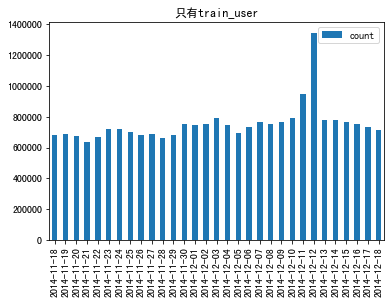

In [85]:
import matplotlib.pyplot as plt
df_count_day=pd.DataFrame.from_dict(count_day,orient='index',columns=['count'])
df_count_day['count'].plot(kind='bar')
plt.figure
plt.legend(loc='best')
plt.savefig("train_user")
plt.title("只有train_user")
plt.show()

In [86]:
df_p=pd.read_csv('tianchi_fresh_comp_train_item.csv')
df_p

,item_id,item_geohash,item_category
0,100002303,NaN,3368
1,100003592,NaN,7995
2,100006838,NaN,12630
3,100008089,NaN,7791
4,100012750,NaN,9614
...,...,...,...
620913,99994679,NaN,9205
620914,99995241,NaN,597
620915,99998434,NaN,8099
620916,99998861,NaN,12553


In [87]:
#使用reset_index将index还原
def show_count_day(df):
    count_day=defaultdict(int)
    #从2014-11-18遍历到2014-12-18
    str1='2014-11-17'
    temp_date=datetime.strptime(str1,'%Y-%m-%d')
    delta=timedelta(days=1)
    for i in range(31):
        temp_date=temp_date+delta
        #将时间转化为字符串类型
        temp_str=temp_date.strftime('%Y-%m-%d')
        #df的index为时间
        count_day[temp_str]+=df[temp_str].shape[0]
    df_count_day=pd.DataFrame.from_dict(count_day,orient='index',columns=['count'])
    df_count_day['count'].plot(kind='bar')
    plt.figure
    plt.legend(loc='best')
    plt.title("train_user和train_item合并")
    plt.savefig("train_user与train_item合并")
    plt.show()    

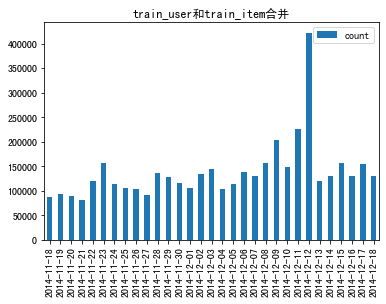

In [88]:
df=pd.merge(df,df_p,on=['item_id']).set_index('time')
show_count_day(df)

{'2014-12-12 00': [29817, 336, 285, 758], '2014-12-12 01': [8736, 101, 288, 75], '2014-12-12 02': [13356, 24, 196, 22], '2014-12-12 03': [4530, 14, 42, 27], '2014-12-12 04': [4280, 11, 42, 10], '2014-12-12 05': [1243, 4, 46, 27], '2014-12-12 06': [6992, 20, 388, 60], '2014-12-12 07': [12673, 24, 102, 80], '2014-12-12 08': [19034, 40, 462, 558], '2014-12-12 09': [13913, 39, 176, 130], '2014-12-12 10': [43971, 55, 522, 210], '2014-12-12 11': [29353, 1662, 468, 140], '2014-12-12 12': [32532, 60, 211, 144], '2014-12-12 13': [9523, 65, 1811, 1745], '2014-12-12 14': [23214, 74, 182, 134], '2014-12-12 15': [9205, 51, 204, 122], '2014-12-12 16': [8948, 50, 145, 83], '2014-12-12 17': [20686, 225, 274, 165], '2014-12-12 18': [8288, 75, 109, 79], '2014-12-12 19': [19089, 48, 171, 118], '2014-12-12 20': [16837, 93, 198, 119], '2014-12-12 21': [20207, 85, 325, 176], '2014-12-12 22': [22404, 109, 373, 189], '2014-12-12 23': [25051, 1745, 1028, 197]}


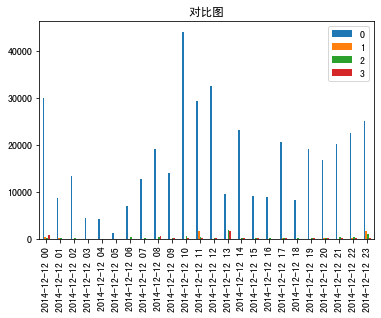

In [89]:
def show_count_hour(date1):
    count_hour={}
    #设置初始值
    for i in range(24):
        time_str=date1+' %02.d'%i
#         print(time_str)
        count_hour[time_str]=[0,0,0,0]
        temp=df[time_str]['behavior_type'].value_counts()
        for j in range(len(temp)):
            count_hour[time_str][temp.index[j]-1]+=temp[temp.index[j]]
    print(count_hour)        
    #从字典类型生成DataFrame
    df_count_hour=pd.DataFrame.from_dict(count_hour,orient="index")
    df_count_hour.plot(kind='bar')
    plt.legend(loc="best")
    plt.title("对比图")
    plt.show()
show_count_hour('2014-12-12')        